In [32]:
import numpy as np
import matplotlib.pyplot as plt
import argparse as ap
import csv
import torch.nn.functional as F
import torch.nn as nn
import torch
import glob
import os
import pandas as pd

Text(0.5, 1.0, 'AAPL')

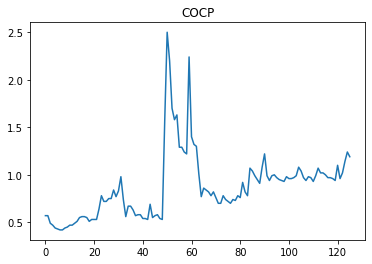

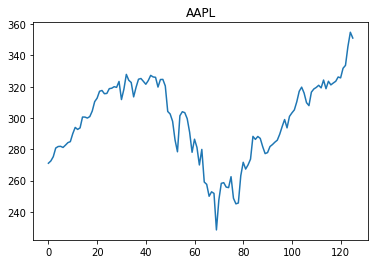

In [78]:
# Data Reading
num_stocks = 2
prices = np.zeros((126, num_stocks))
price_index = 4 # highs
iterations = 0

retval = os.getcwd()
os.chdir(retval)
for file in glob.glob("*.csv"): 
    i = 126
    this_prices = np.zeros(126)
    with open(file) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            if i == 126:
                i -= 1
                continue
            ind = (row[price_index].find('$')) + 1
            prices[i][iterations] = float(row[price_index][ind:])
            i -= 1
    
    iterations += 1

plt.figure()
plt.plot(prices[:,0])
plt.title("COCP")

plt.figure()
plt.plot(prices[:,1])
plt.title("AAPL")



# prices = np.transpose(prices)


In [ ]:
class SimpleCNN(torch.nn.Module):
    def __init__(self, n1_kern, n2_kern, n3_kern, n1_chan):
        super(SimpleCNN, self).__init__()
        # kernel = (n1_kern, n2_kern, n3_kern)
        self.conv1 = torch.nn.Conv2d(1, n1_chan, kernel_size=n1_kern)
        self.conv2 = torch.nn.Conv2d(n1_chan, 2, kernel_size=n2_kern, stride=2)

    def forward(self, x):
        size = x.size()[0]
        x = x.view(size, 1, 512, 512)
        Relu1 = F.relu(self.conv1(x))
        Relu2 = F.relu(Relu1)
        dim3 = Relu2.size()[2]
        dim4 = Relu2.size()[3]
        pool = nn.MaxPool2d((dim3, dim4), stride=2)
        logits = pool(Relu2)
        logits = logits.view(logits.size()[0], 40)
        return logits